<a href="https://colab.research.google.com/github/sameer0013/Data-science/blob/main/KNN/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

K - Nearest Neighbour

In [ ]:
import  numpy as np
import pandas as pd

In [ ]:
from plotly import data

In [ ]:
iris = data.iris()

In [ ]:
iris.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
126,6.2,2.8,4.8,1.8,virginica,3
5,5.4,3.9,1.7,0.4,setosa,1
6,4.6,3.4,1.4,0.3,setosa,1
53,5.5,2.3,4.0,1.3,versicolor,2
22,4.6,3.6,1.0,0.2,setosa,1


In [ ]:
X=iris.drop(['species','species_id'],axis =1)

In [ ]:
Y =iris['species_id']

In [ ]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: species_id, dtype: int64

In [ ]:
Y.iloc[0]

1

In [ ]:
Y.iloc[[1,2,5,0]]

1    1
2    1
5    1
0    1
Name: species_id, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,Y)

In [ ]:
x_train.values

In [ ]:
class KNN():
  def __init__(self,k=3):
    self.k=k
  def fit(self,X,Y):
    self.X_train = X
    self.Y_train = Y 
  def distance(self,a,b):
    return np.sqrt(((a - b)**2).sum()) # euclidean formula for distance
  def label(self,x):
    # distance nikalo
    dist = np.zeros(self.X_train.shape[0])
    for i,z in enumerate(self.X_train.values):
      dist[i] = self.distance(z,x)
    
    # k min
    idx = np.argsort(dist)
    idx = idx[:self.k]

    lab =self.Y_train.iloc[idx] # we get label of k nearest point from point x
    label,counts = np.unique(lab,return_counts=True)



    # max class(konsi class mai hai) 
    return label[counts.argmax()]
 

  def predict(self,X_test):
    y_pred = np.full(X_test.shape[0],self.Y_train.iloc[0])
    for i,x in enumerate(X_test.values):
      y_pred[i] = self.label(x)
    return y_pred

In [ ]:
model =KNN()

In [ ]:
model.fit(x_train,y_train)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,model.predict(x_test))

1.0

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
skmodel=  KNeighborsClassifier(n_neighbors = 7)
skmodel.fit(x_train,y_train)
accuracy_score(y_test,skmodel.predict(x_test))

0.9473684210526315

In [ ]:
train=[]
test=[]
for k in range(1,20):
  skmodel = KNeighborsClassifier(n_neighbors= k)
  skmodel.fit(x_train,y_train)
  test.append(accuracy_score(y_test,skmodel.predict(x_test)))
  train.append(accuracy_score(y_train,skmodel.predict(x_train)))


In [ ]:
import matplotlib.pyplot as plt

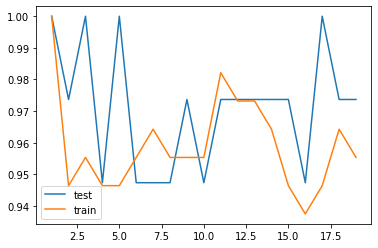

In [ ]:
plt.plot(np.arange(1,20),test,label='test')
plt.plot(np.arange(1,20),train,label='train')
plt.legend()
plt.show()

In [ ]:
train=[]
test=[]
for k in range(1,20):
  model = KNN( k)
  model.fit(x_train,y_train)
  test.append(accuracy_score(y_test,model.predict(x_test)))
  train.append(accuracy_score(y_train,model.predict(x_train)))

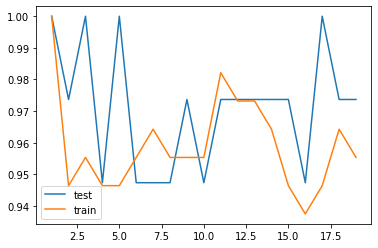

In [ ]:
plt.plot(np.arange(1,20),test,label='test')
plt.plot(np.arange(1,20),train,label='train')
plt.legend()
plt.show()

In [ ]:
ar= np.full(5,"Ankit")
ar

array(['Ankit', 'Ankit', 'Ankit', 'Ankit', 'Ankit'], dtype='<U5')

In [ ]:
ar =np.array([30,20,10,4,23,22])
ar

array([30, 20, 10,  4, 23, 22])

In [ ]:
idx =ar.argsort() #index based sorting
idx 

array([3, 2, 1, 5, 4, 0])

In [ ]:
df=pd.DataFrame([1,2,3,4],index=['a','b','c','d'])

In [ ]:
df.values

array([[1],
       [2],
       [3],
       [4]])

In [ ]:
ar=["sameer","yash","okok"]

In [ ]:
for i,x in enumerate(ar):
  print(i,x)

0 sameer
1 yash
2 okok


In [ ]:
ar =np.array([0,1,0,1,1,0,0,1,1,1])

In [ ]:
a,count = np.unique(ar,return_counts=True)

In [ ]:
a

array([0, 1])

In [ ]:
count

array([4, 6])

In [ ]:
count.argmax() # tell which category is maximum

1